# Wine data exploration and quality prediction

## Table of Content

* 1 [Introduction: Business Problem](#introduction)
* 2 [Data](#data)
* 3 [Data Exploration](#explo)
* 4 [Data Preprocessing](#prep)
* 5 [Modelling](#modell)
* 6 [Conclusion](#conclusion)

# Introduction <a name="introduction"></a>

The idea of this project is linked to an application for the company Vicampo, the most well known wine online shop in Germany and a great platform, which connects winemakers and consumers. From my own experience the companys website is clean and structured and the buying experience is great. Data says people are most affected by the wine bottle labels, so their decisions are made by marketing, therefore often people make bad decision and buy wine which is not their taste. As i know from my  working student job in retail for the normal consumer wine purchasing is always difficult and often they need assistance and advise, by the reason one can argue about the taste, Vicampo is creating a nice recommandation system of your individual taste by previous orders and your feedback for different purchased wines. Also the ratings given by vicampo and sommeliers like Luca Maroni are improving the buying experience. In my opinion wine purchasing was never easier. I especially liked to bought wine at Vicampo which is not common to buy in retail. 

As a sample of what data science can aid you in the field of wine business i have a smal project, we will explore wine in more detail and try to find features which are connected to the quality of the product. Additionally we will create a modell which should predict the quality of a wine based the features and  previous ratings.

![Grapes](trauben.jpg)

#### Load packages

In [177]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import statsmodels
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from IPython.display import display
from PIL import Image
import gzip
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow import keras

# Data <a name="data"></a>
Source of Data: http://www3.dsi.uminho.pt/pcortez/wine/

Wine Quality dataset is public available for research in the University of California, Irvine Machine Learning repository created by Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) in 2009. This repository has two datasets of red and white wine samples which consists of inputs includes objective tests and the output is based on sensory data made by the median of at least 3 evaluations of wine experts. Each expert graded the wine quality between 0 (bad) and 10 (excellent).

#### The attributes:

- __Fixed Acidity__: measurement of the total concentration of titratable acids and free hydrogen ions present in the wine. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic) They occur naturally in the grapes or are created through the fermentation process. 


- __Volatile Acidity__: Can be a indicator of spoilage or problems in the manufactoring process(damaged grapes, exposure to air) It is mostly caused by bacteria, which are creating acetic acid (this acid gives vinegar its characteristic flavor and aroma.


- __Citric Acid__: natural preservation and sometimes added to the wine to give the wine more freshness and to increasing the acidity


- __Residual Sugar__: is the natural grape sugar that are leftovers from the fermantation process. The trick is the perfect balance between sweetness and sourness 


- __Chloride__: being a major contributor to saltiness, to large conenctraions of chlorides have a bad impact on the flavour 


- __Free Sulfur Dioxide__: also kown as sulfites, this is the part of the sulphur dioxide that when added to a wine is said to be free after the ramaiing part binds. To much of it is undesirable and gives a pungent odour.


- __Total Sulfur Dioxide__: is the sum total of bound and free sulfur dioxide. It is mainly added to kill harmful bacteria and preserve quality and freshness. Normally there are legal limits.


- __Density__: this can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. Sweeter wines generally have higher density.


- __pH__: also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.


- __Sulphates__: These are mineral salts containing sulfur. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor.


- __Alcohol__: is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. We interpret alcohol using many different taste receptors.


- __Wine type__: since we originally had two datasets for red and white win, we will intrtoduce this attribute in the final merged dataset.


- __Quality__: wine experts graded the wine between 0-10. The Score ist the median of at least three evaluations.

#### Load Dataset

In [81]:
#Load the data
red_wine = pd.read_csv("data/winequality-red.csv", sep = ";")
white_wine = pd.read_csv("data/winequality-white.csv", sep = ";")

In [268]:
print(red_wine.shape)
red_wine.head()

(1599, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10.8,0.50,0.46,2.5,0.073,5.0,27.0,1.00010,3.05,0.64,9.5,5,red
296,10.6,0.83,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.9,5,red
297,7.1,0.63,0.06,2.0,0.083,8.0,29.0,0.99855,3.67,0.73,9.6,5,red
298,7.2,0.65,0.02,2.3,0.094,5.0,31.0,0.99930,3.67,0.80,9.7,5,red


In [271]:
red_wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [83]:
print(white_wine.shape)
white_wine.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [270]:
white_wine["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

# Data Exploration <a name="explo"></a>

Similar to Sherlock Holmes, who can tell a lot about a person before they start to speak we can deduce a lot about data and relationships among the features before complex modelling and feeding the data to algorithms. Data Exploration is one of the most important steps in the process of the analysis. We will try to find features whoich are connected to a rise of quality. We will use the standard descriptive analysis to get familiar with the data and check the data for outliers which can have a bad impact for the modell. We will check the data for correlations and relationships.


Often data can be quite messy, but this data set seems to be well maintained and clean. Anyway we will check for missing values.

In [84]:
white_wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [85]:
red_wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

#### Adding type of wine and merge dataframes

In [86]:
red_wine["Type"] = "red"
white_wine["Type"] = "white"
redwhite = pd.concat([red_wine,white_wine])

In [87]:
redwhite

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


#### Adding the Quality Label 

- 5 <= Low
- 6 <= Medium >= 7 
- 7 > High

In [88]:
redwhite["quality_label"] = redwhite.quality.apply(lambda x: "low" if x <= 5 else "medium" if x <= 7 else "high")
redwhite

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,medium


#### Data understanding and detecting outliers
To get a better feeling for the data the .describe() method is easy to use and pretty informative. It’s a very good method to have an intuitive understanding of the problems in the dataset. At the same time you can check the data for outliers and other specific criterias. We illustrate the statistics for all 3 quality labels

In [90]:
pd.set_option('display.max_columns', 50)
#pd.set_option('display.width', 1000)

In [91]:
low = round(redwhite[redwhite["quality_label"] == "low"].describe(),2)
med = round(redwhite[redwhite["quality_label"] == "medium"].describe(),2)
hig = round(redwhite[redwhite["quality_label"] == "high"].describe(),2)
pd.concat([low, med, hig], axis=0, keys=["low quality", "medium quality", "high quality"]).T

low quality                                              \
                           count    mean    std   min    25%     50%     75%   
fixed acidity             2384.0    7.33   1.27  4.20   6.50    7.10    7.80   
volatile acidity          2384.0    0.40   0.19  0.10   0.26    0.34    0.50   
citric acid               2384.0    0.30   0.16  0.00   0.21    0.30    0.40   
residual sugar            2384.0    5.65   4.92  0.60   1.80    2.90    8.52   
chlorides                 2384.0    0.06   0.04  0.01   0.04    0.05    0.08   
free sulfur dioxide       2384.0   29.48  19.84  2.00  14.00   26.00   42.00   
total sulfur dioxide      2384.0  119.28  61.89  6.00  68.00  124.00  167.00   
density                   2384.0    1.00   0.00  0.99   0.99    1.00    1.00   
pH                        2384.0    3.21   0.16  2.74   3.11    3.20    3.31   
sulphates                 2384.0    0.52   0.14  0.25   0.44    0.50    0.58   
alcohol                   2384.0    9.87   0.84  8.00   9.30    9.60   10.40   
quality                   2384.0    4.88   0.36  3.00   5.00    5.00    5.00   

                             medium quality                              \
                         max          count    mean    std   min    25%   
fixed acidity          15.90         3915.0    7.16   1.31  3.80   6.40   
volatile acidity        1.58         3915.0    0.31   0.14  0.08   0.21   
citric acid             1.00         3915.0    0.33   0.13  0.00   0.26   
residual sugar         23.50         3915.0    5.32   4.68  0.70   1.80   
chlorides               0.61         3915.0    0.05   0.03  0.01   0.04   
free sulfur dioxide   289.00         3915.0   30.96  16.33  1.00  19.00   
total sulfur dioxide  440.00         3915.0  113.51  53.57  6.00  81.00   
density                 1.00         3915.0    0.99   0.00  0.99   0.99   
pH                      3.90         3915.0    3.22   0.16  2.72   3.11   
sulphates               2.00         3915.0    0.54   0.15  0.22   0.43   
alcohol                14.90         3915.0   10.81   1.20  8.40   9.80   
quality                 5.00         3915.0    6.28   0.45  6.00   6.00   

                                             high quality                 \
                         50%     75%     max        count    mean    std   
fixed acidity           6.90    7.60   15.60        198.0    6.85   1.14   
volatile acidity        0.27    0.36    1.04        198.0    0.29   0.12   
citric acid             0.31    0.39    1.66        198.0    0.33   0.10   
residual sugar          3.00    7.90   65.80        198.0    5.35   4.16   
chlorides               0.04    0.06    0.42        198.0    0.04   0.02   
free sulfur dioxide    29.00   41.00  112.00        198.0   34.51  17.08   
total sulfur dioxide  116.00  150.00  294.00        198.0  117.48  41.69   
density                 0.99    1.00    1.04        198.0    0.99   0.00   
pH                      3.21    3.33    4.01        198.0    3.23   0.16   
sulphates               0.51    0.61    1.95        198.0    0.51   0.16   
alcohol                10.80   11.70   14.20        198.0   11.69   1.27   
quality                 6.00    7.00    7.00        198.0    8.03   0.16   

                                                            
                        min    25%     50%     75%     max  
fixed acidity          3.90   6.20    6.80    7.30   12.60  
volatile acidity       0.12   0.21    0.28    0.35    0.85  
citric acid            0.03   0.28    0.32    0.37    0.74  
residual sugar         0.80   2.00    4.05    7.57   14.80  
chlorides              0.01   0.03    0.04    0.04    0.12  
free sulfur dioxide    3.00  24.00   34.00   43.00  105.00  
total sulfur dioxide  12.00  96.00  118.50  145.00  212.50  
density                0.99   0.99    0.99    0.99    1.00  
pH                     2.88   3.13    3.23    3.33    3.72  
sulphates              0.25   0.38    0.48    0.60    1.10  
alcohol                8.50  11.00   12.00   12.60  

#### Highlights from descriptive statistic above:

-  It is intresting that the quality rises with the alcohol percentage, increased by about 1% at each level. Low quality wines have the lowest standard deviation


- Although the chlorides and volatile acidity are less present in higher quality wines although their standard deviation reduces with the quality.


- The free sulfur dioxide is higher with higher quality, but their standard deviation decrease with the increase the quality.


- Higher quality has less fixed acidity



When we take a closer look the the min/max and mean values we can also note some outliers: Residual Sugar, Chlorides and free sulfur dioxide is noticable.

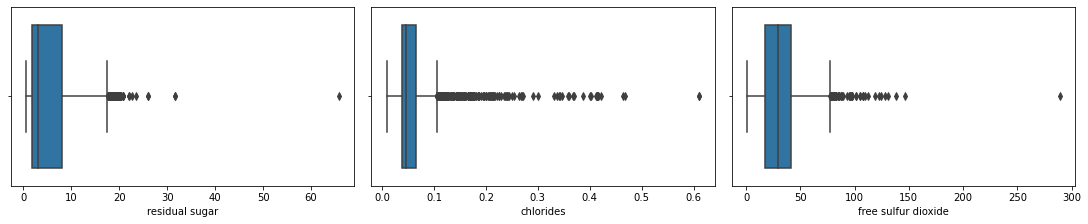

In [92]:
fig,axes = plt.subplots(1, 3,constrained_layout=True,figsize =(15,3))
                           
sns.boxplot(redwhite["residual sugar"],ax=axes[0])
sns.boxplot(redwhite["chlorides"],ax=axes[1])
sns.boxplot(redwhite["free sulfur dioxide"],ax=axes[2])

#### Lets visualize a scatter matrix to compare the features better.

In [93]:
redwhite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   object 
 13  quality_label         6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 761.4+ KB


In [94]:
redwhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


#### Pairplot - great easy visualization of all features
At last, we would like to get an overview of the spread and relationship among different features by quality labels. Pairplots are very handy to visualise the scatter plot among different feature. The feature “quality_label” is mentioned as the hue as we want to colour code the plot based on it.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


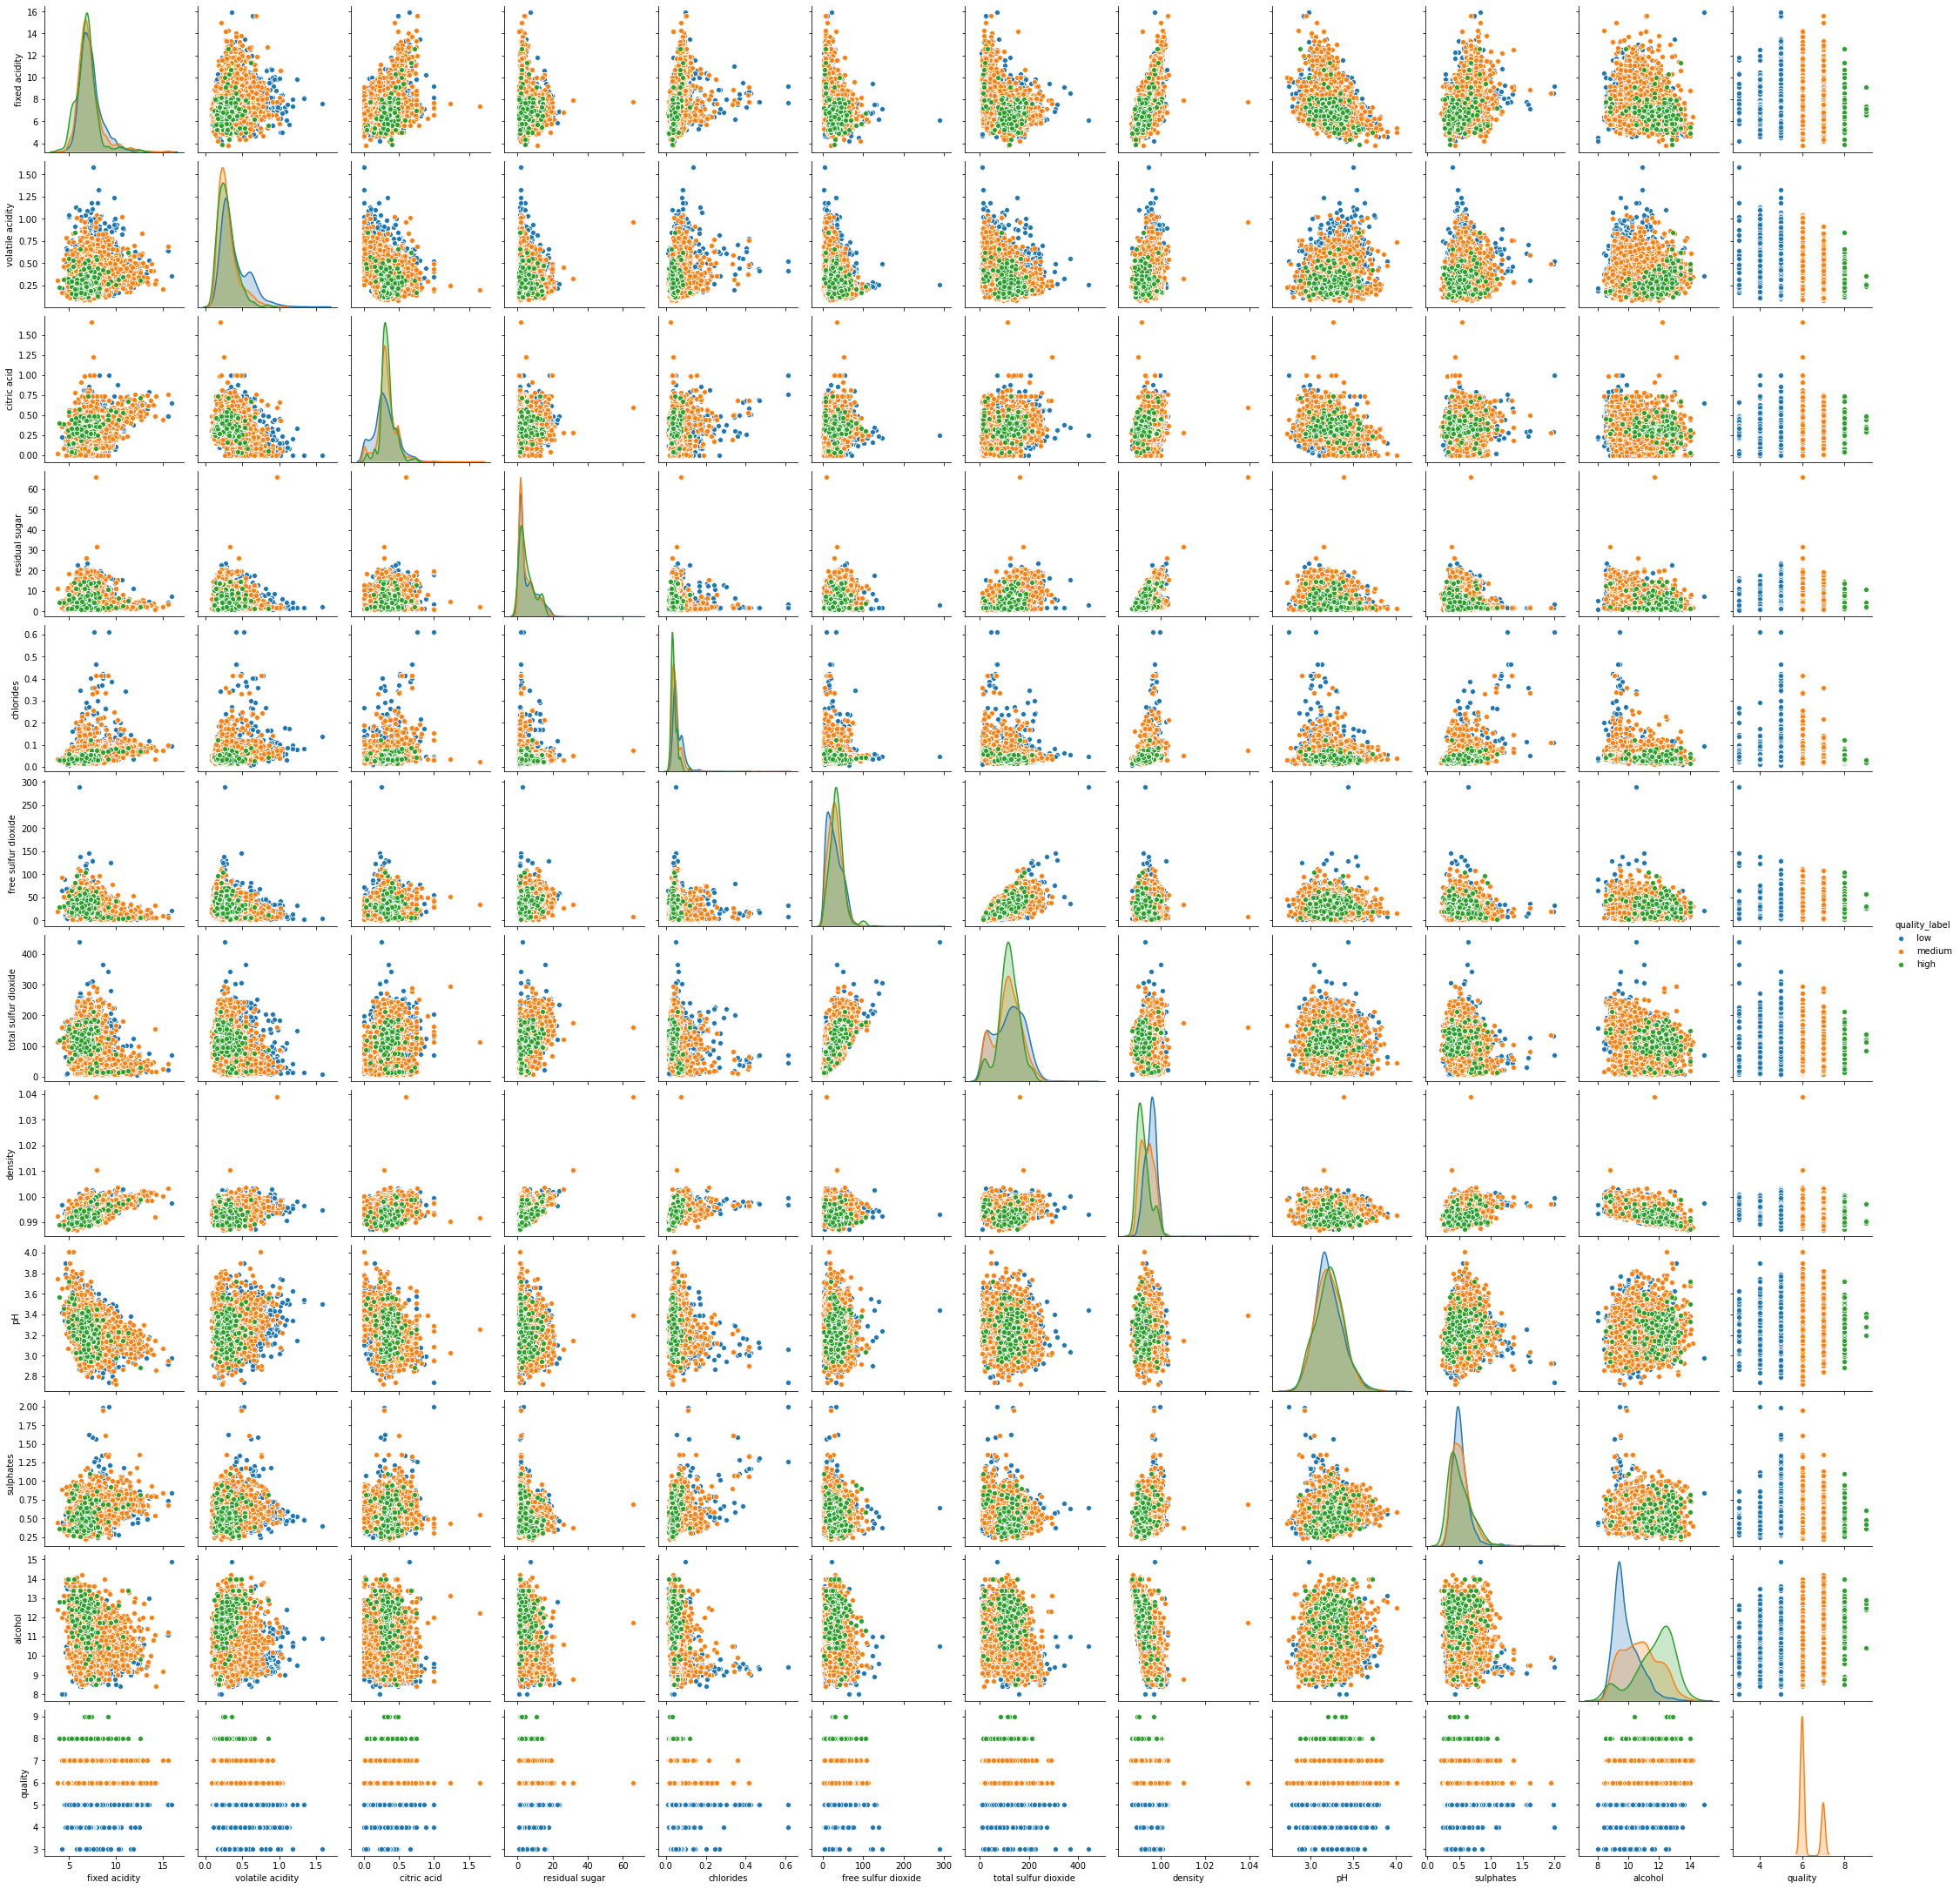

In [95]:
#sns.pairplot(data = redwhite, hue="Type")
sns.pairplot(data = redwhite.drop(columns=["Type"]), hue= "quality_label")

This result is in alignment with the insights from above:

- Lower levels of Sulphat in higher quality wines
- High quality wines have more alcohol

#### Correlation matrix

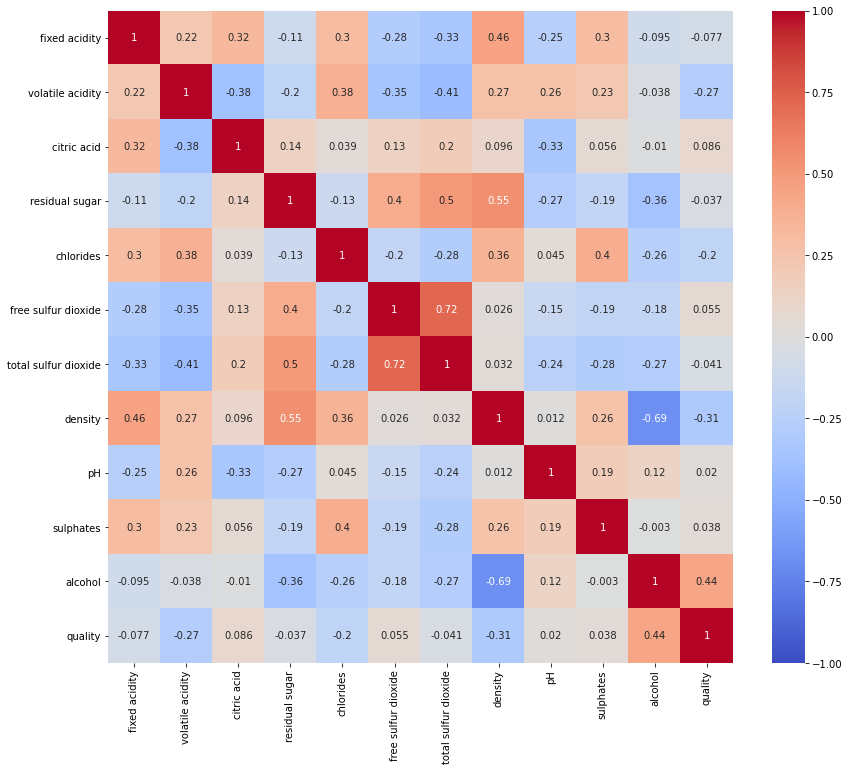

In [96]:
correlation = redwhite.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="coolwarm")

- The higest correlation, 0,72, is see between total and free sulfur dioxide, which is expected, but the two measures have low correlation and in opposite directions with the quality,. So, we will treat this if necessary when we check the multicollinearity.

- We will take a closer look to the features which are correlating with quality: alcohol, density, chlorides, volatile acidity. (Even though the correlation is weak)

#### Plot the intresting features

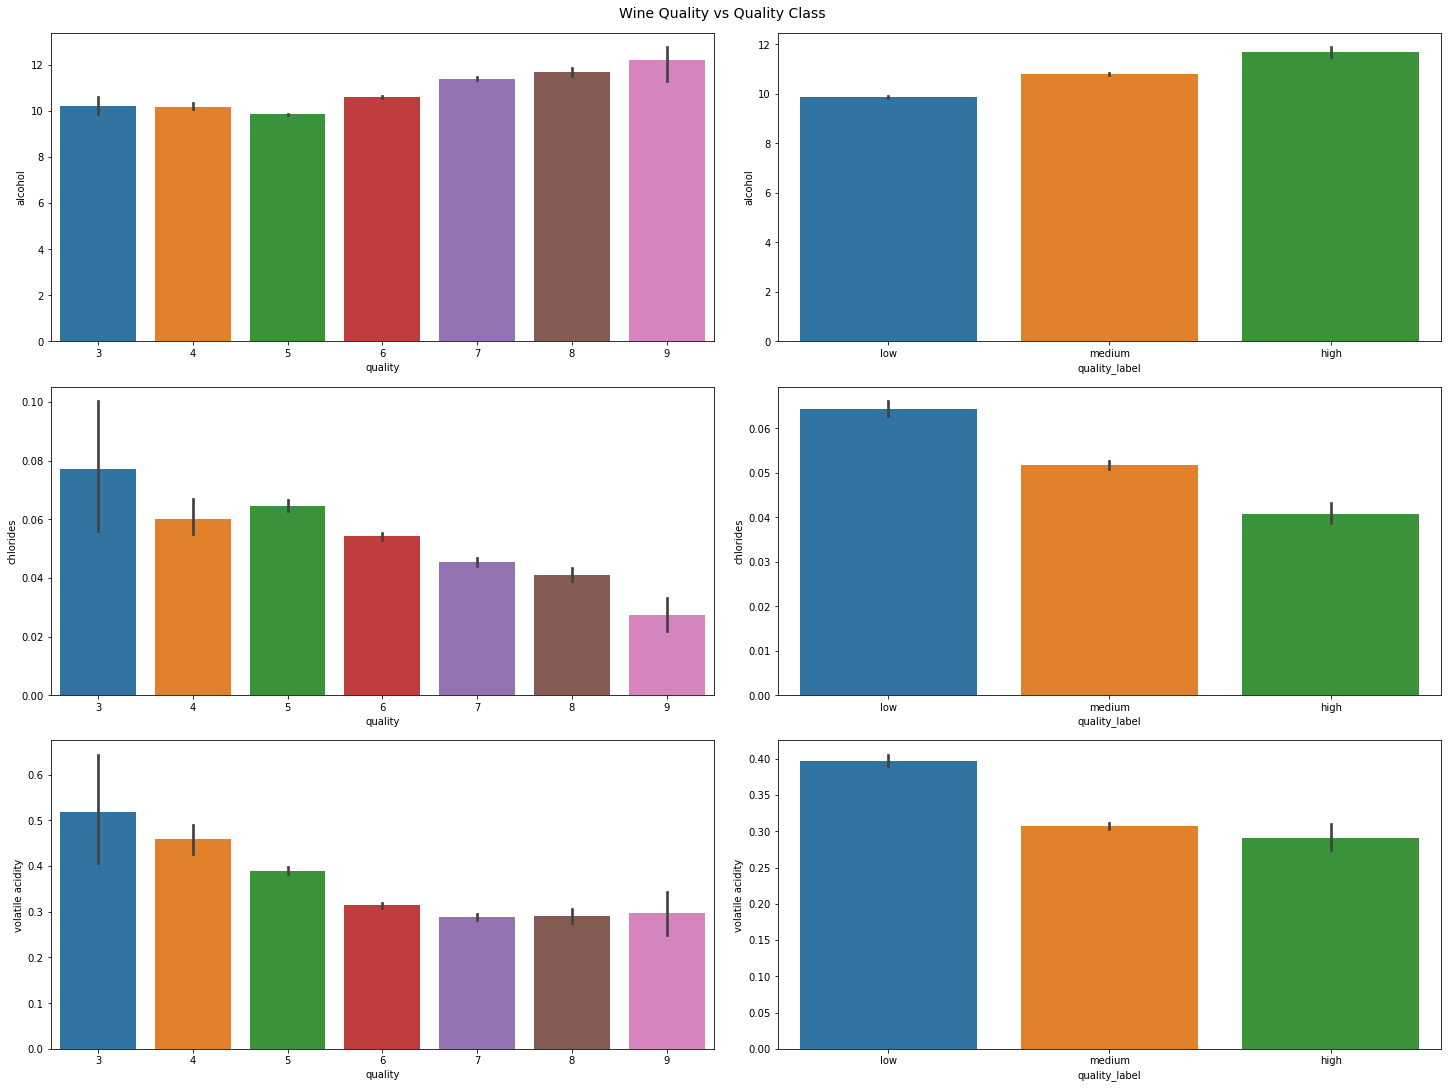

In [97]:
fig, axs = plt.subplots(3,2,figsize=(20,15),constrained_layout=True)
fig.suptitle("Wine Quality vs Quality Class ", fontsize=14)

sns.barplot(x="quality", y="alcohol", data=redwhite, ax=axs[0,0])
sns.barplot(x="quality", y="chlorides", data=redwhite, ax=axs[1,0])
sns.barplot(x="quality", y="volatile acidity", data=redwhite, ax=axs[2,0])

sns.barplot(x="quality_label", y="alcohol", data=redwhite, ax=axs[0,1])
sns.barplot(x="quality_label", y="chlorides", data=redwhite, ax=axs[1,1])
sns.barplot(x="quality_label", y="volatile acidity", data=redwhite, ax=axs[2,1])


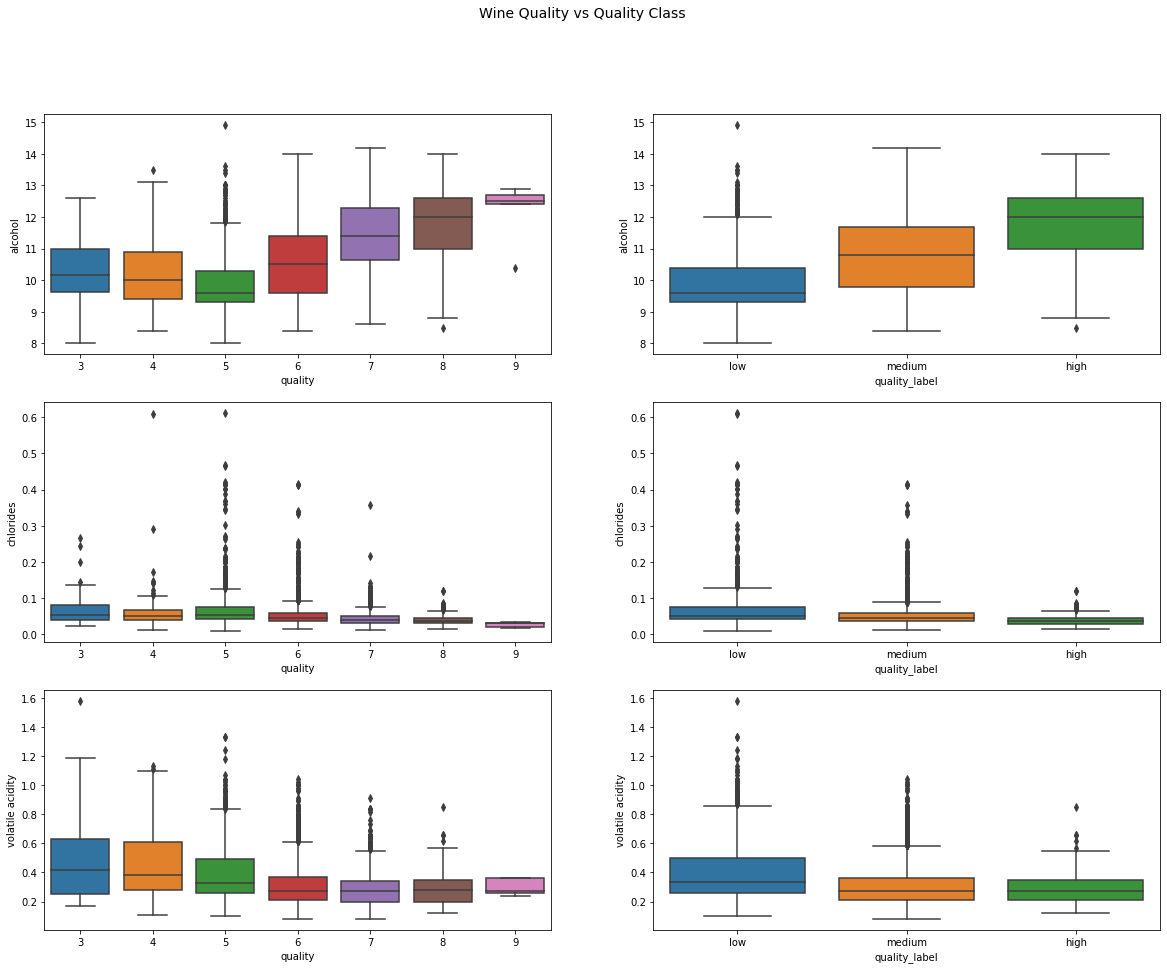

In [98]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("Wine Quality vs Quality Class ", fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=redwhite, ax=axes[0,0])
sns.boxplot(x="quality", y="chlorides", data=redwhite, ax=axes[1,0])
sns.boxplot(x="quality", y="volatile acidity", data=redwhite, ax=axes[2,0])

sns.boxplot(x="quality_label", y="alcohol", data=redwhite, ax=axes[0,1])
sns.boxplot(x="quality_label", y="chlorides", data=redwhite, ax=axes[1,1])
sns.boxplot(x="quality_label", y="volatile acidity", data=redwhite, ax=axes[2,1])

# Data Preprocessing <a name="prep"></a>

In this step of the analysis I defined the features to train and test the machine learning model and the target to predict which is "quality" and "quality_label". I will do some feature scaling to normalize the features to broing them to a comparable grade, otherwise different scales of features may impact the performance of the machine learning models. For this purpose, I used StandardScaler() function defined in Scikit-learn. And finally I split the dataset into training and test sets 70% and 30% respectively. We are also going to eleminate the outliers as seen in the boxplot above they distort the picture.

#### eliminating outliers!
Therefore we will use the z score: take the data point or observation, subtract the mean of the population and divide it by the standard deviation. It represents how many standard deviations away a data point is from the mean. The data points which are too far from the mean are considered as outliers

In [99]:
z_df, rest_df = redwhite.loc[:,"fixed acidity":"alcohol"], redwhite[["quality","Type","quality_label"]]

Due to problems by merching the df caused by using a copy of the data frame. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [100]:
#rest_df.to_csv("rest_df.csv")

In [101]:
rest_df = pd.read_csv("rest_df.csv") 

In [102]:
rest_df.head()

,Unnamed: 0,quality,Type,quality_label
0,0,5,red,low
1,1,5,red,low
2,2,5,red,low
3,3,6,red,medium
4,4,5,red,low


In [103]:
rest_df.drop(columns=["Unnamed: 0"], inplace = True)

In [104]:
z_df.shape

(6497, 11)

In [105]:
z = np.abs(scipy.stats.zscore(z_df))
z_df = z_df[(z < 3).all(axis=1)]
z_df.shape

(6009, 11)

In [106]:
rest_df.shape

(6497, 3)

In [107]:
z_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4


In [108]:
rest_df["ID"] = rest_df.index

In [109]:
redwhitez = pd.merge(z_df, rest_df, left_index=True, right_on="ID", how='left')

In [128]:
redwhitez.drop(columns=["ID"],inplace=True)

In [129]:
redwhitez.shape

(6009, 14)

In [130]:
redwhite.shape

(6497, 14)

#### We lost 488 rows by applying the z score
Lets have a look at the boxplots again.

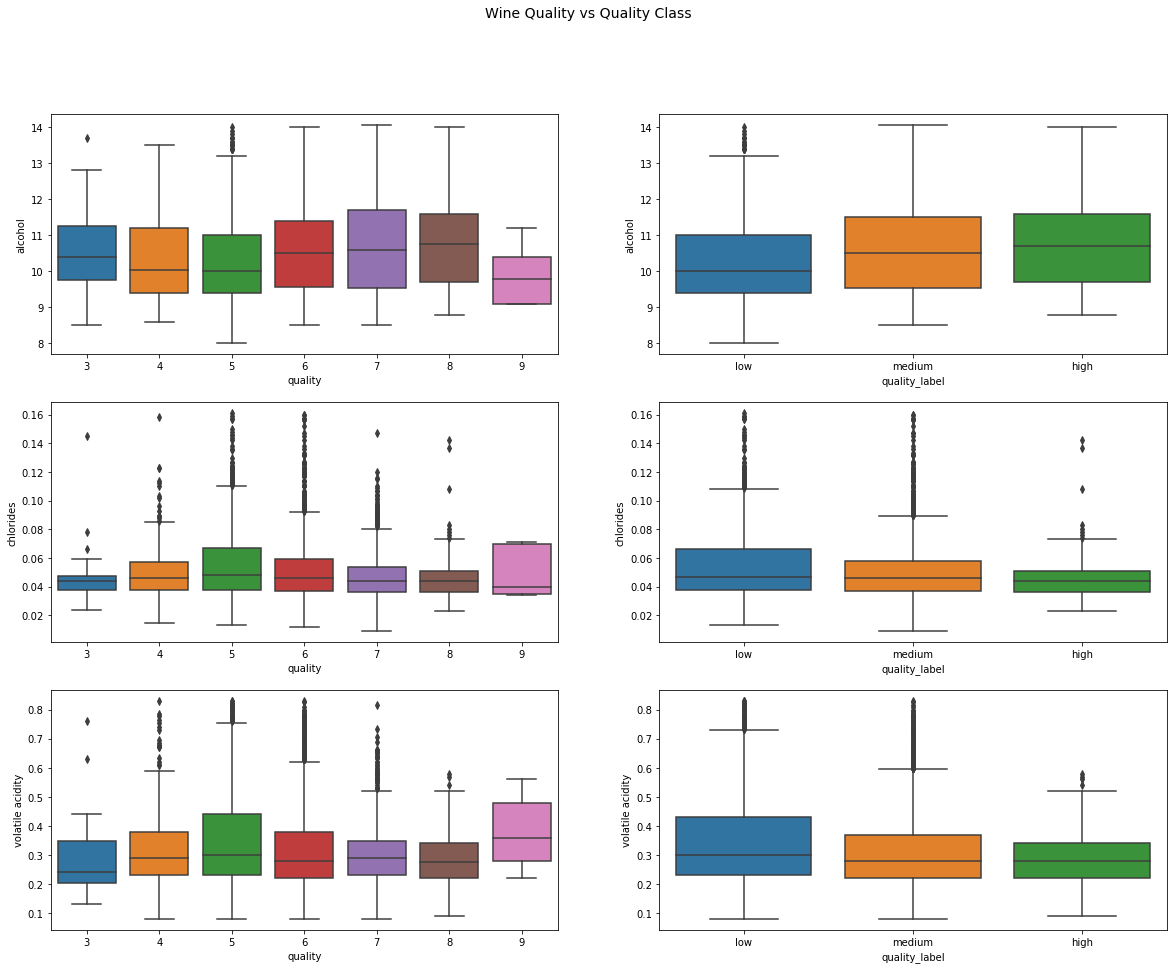

In [131]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("Wine Quality vs Quality Class ", fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=redwhitez, ax=axes[0,0])
sns.boxplot(x="quality_label", y="alcohol", data=redwhitez, ax=axes[0,1])
sns.boxplot(x="quality", y="chlorides", data=redwhitez, ax=axes[1,0])
sns.boxplot(x="quality_label", y="chlorides", data=redwhitez, ax=axes[1,1])
sns.boxplot(x="quality", y="volatile acidity", data=redwhitez, ax=axes[2,0])
sns.boxplot(x="quality_label", y="volatile acidity", data=redwhitez, ax=axes[2,1])


plt.show()

#### Imbalance check

In [132]:
redwhitez["quality"].value_counts()

6    2478
5    2238
7     911
4     196
8     154
3      27
9       5
Name: quality, dtype: int64

#### Problem imbalance

Due to the class imbalance the pink box is questionable. Unfortunately the imbalance is pretty high in the dataset. As you can see most of our data is in the quality level of 5 and 6. So a modell which is just labeling everything to 5 and 6 will have a great accuracy caused by the imbalance because almost all the data is in this range.

#### Feature Scaling - Standardization
In this step of the analysis Standardization through Feature Scaling is pretty important to bring the features to a comparable grade.

In [133]:
redwhitez.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,low


#### Predicting Quality Scores 3-9

In [263]:
X = np.asarray(redwhitez.loc[:,"fixed acidity":"alcohol"])
y = np.asarray(redwhitez["quality"])

In this project we will just use the StandardScaler ready to use from Sckitlearn

In [135]:
X = preprocessing.StandardScaler().fit_transform(X)

In [136]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

print ("train set: ", X_train.shape, y_train.shape)
print ("test set: ", X_test.shape, y_test.shape)

train set:  (4206, 11) (4206,)
test set:  (1803, 11) (1803,)


# Modelling <a name="modell"></a>



In [137]:
# Train and fit the Decision Tree Classification model

tree = DecisionTreeClassifier(random_state=1,criterion = "entropy")
tree.fit(X_train, y_train)

# Evaluate the model with out-of-sample test set
y_pred = tree.predict(X_test)

# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=2))

# Calculate roc_auc score with multiclass parameter
print("roc_auc_score",roc_auc_score(y_test,tree.predict_proba(X_test), multi_class="ovr"))

##Confusion Matrix
#conf_mat = confusion_matrix(y_test, y_pred)
#print("\n",conf_mat,"\n")


        
df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
confusionmatrix = pd.crosstab(df["Actual"], df["Predicted"], rownames=["Actual"], colnames=["Predicted"], margins = True)
confusionmatrix

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.08      0.08      0.08        66
           5       0.45      0.50      0.47       648
           6       0.47      0.44      0.46       762
           7       0.23      0.20      0.21       280
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         2

    accuracy                           0.40      1803
   macro avg       0.17      0.17      0.17      1803
weighted avg       0.40      0.40      0.40      1803

roc_auc_score 0.5240437485386754


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,3,4,5,6,7,8,All
Actual,,,,,,,
3,0,0,5,3,1,0,9
4,1,5,20,32,8,0,66
5,3,25,321,214,75,10,648
6,7,23,272,338,96,26,762
7,1,9,89,118,55,8,280
8,0,3,10,15,8,0,36
9,0,0,2,0,0,0,2
All,12,65,719,720,243,44,1803


As you can see there is not even one predicted wine in the quality level 9 so this column is totally missing. The high quality wines are predicted as quality level 5

In [138]:
from sklearn.ensemble import RandomForestClassifier

# Train and fit the Random Forest Classification 

forest = RandomForestClassifier(n_estimators=100,random_state = 0)
forest.fit(X_train, y_train)

# Test out-of-sample test set
y_pred2 = forest.predict(X_test)

# Classification report
print(metrics.classification_report(y_test, y_pred2.round(), digits=3))

# Calculate roc_auc score with multiclass parameter
print("roc_auc_score",roc_auc_score(y_test,forest.predict_proba(X_test), multi_class="ovr",),"\n")

df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred2})
confusionmatrix = pd.crosstab(df["Actual"], df["Predicted"], rownames=["Actual"], colnames=["Predicted"], margins = True)
confusionmatrix

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         9
           4      0.263     0.076     0.118        66
           5      0.454     0.515     0.483       648
           6      0.468     0.572     0.515       762
           7      0.376     0.136     0.199       280
           8      0.000     0.000     0.000        36
           9      0.000     0.000     0.000         2

    accuracy                          0.451      1803
   macro avg      0.223     0.186     0.188      1803
weighted avg      0.429     0.451     0.427      1803

roc_auc_score 0.5935936265061276 



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,3,4,5,6,7,8,All
Actual,,,,,,,
3,0,0,4,4,1,0,9
4,0,5,23,35,2,1,66
5,1,4,334,285,22,2,648
6,1,8,273,436,35,9,762
7,1,1,88,150,38,2,280
8,0,1,12,20,3,0,36
9,0,0,1,1,0,0,2
All,3,19,735,931,101,14,1803


#### Predicting low med high

In [139]:
y2 = np.asarray(redwhitez["quality_label"])

In [140]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X, y2, test_size=0.3, random_state=0)

print ("train set: ", X_train2.shape, y_train2.shape)
print ("test set: ", X_test2.shape, y_test2.shape)

train set:  (4206, 11) (4206,)
test set:  (1803, 11) (1803,)


In [144]:
# Train and fit the Decision Tree Classification model

tree = DecisionTreeClassifier(random_state=1,criterion = "entropy")
tree.fit(X_train2, y_train2)

# Evaluate the model with out-of-sample test set
y_pred3 = tree.predict(X_test2)

# Classification report
print(metrics.classification_report(y_test2, y_pred3))

# Calculate roc_auc score with multiclass parameter
#print("roc_auc_score",roc_auc_score(y_test2,forest.predict_proba(X_test2), multi_class="ovr"))

df = pd.DataFrame({"Actual":y_test2, "Predicted":y_pred3})
confusionmatrix = pd.crosstab(df["Actual"], df["Predicted"], rownames=["Actual"], colnames=["Predicted"])
confusionmatrix

              precision    recall  f1-score   support

        high       0.02      0.03      0.02        38
         low       0.50      0.53      0.51       723
      medium       0.65      0.61      0.63      1042

    accuracy                           0.57      1803
   macro avg       0.39      0.39      0.39      1803
weighted avg       0.58      0.57      0.57      1803



Predicted,high,low,medium
Actual,,,
high,1,20,17
low,19,382,322
medium,38,367,637


In [145]:
from sklearn.ensemble import RandomForestClassifier

# Train and fit the Random Forest Classification 

forest = RandomForestClassifier(n_estimators=100,random_state = 0)
forest.fit(X_train2, y_train2)

# Test out-of-sample test set
y_pred4 = forest.predict(X_test2)

# Classification report
print(metrics.classification_report(y_test2, y_pred4))

# Calculate roc_auc score with multiclass parameter
print("roc_auc_score",roc_auc_score(y_test2,forest.predict_proba(X_test2), multi_class="ovr"))

df = pd.DataFrame({"Actual":y_test2, "Predicted":y_pred4})
confusionmatrix = pd.crosstab(df["Actual"], df["Predicted"], rownames=["Actual"], colnames=["Predicted"], margins = True)
confusionmatrix

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        38
         low       0.53      0.46      0.49       723
      medium       0.64      0.71      0.68      1042

    accuracy                           0.60      1803
   macro avg       0.39      0.39      0.39      1803
weighted avg       0.58      0.60      0.59      1803

roc_auc_score 0.6022925513748194


Predicted,high,low,medium,All
Actual,,,,
high,0,11,27,38
low,3,329,391,723
medium,11,286,745,1042
All,14,626,1163,1803


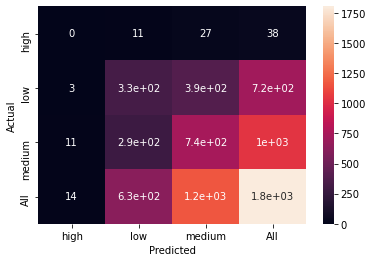

In [146]:
sns.heatmap(confusionmatrix,annot=True)
plt.show()

#### Neural network predicitng quality

In [264]:
# y range 3-9 -> -3 range 0-6
y = y-3

In [334]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=0)
# y2 = quality labels
# y = quality 3-9

print ("train set: ", X_train3.shape, y_train3.shape)
print ("test set: ", X_test3.shape, y_test3.shape)

y_train3 = to_categorical(y_train3)
y_test3 = to_categorical(y_test3)

#convolutional neural network

from keras.models import Sequential

model = Sequential()

model.add(Dense(10, input_dim=11))
#model.add(Activation("relu"))
#model.add(Dropout(0.25))
model.add(Dense(25, activation="relu"))
#model.add(Dropout(0.25))
#model.add(Activation("relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(7, activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.005)
opt1 = keras.optimizers.SGD(lr=5)

model.compile(optimizer= opt, loss="categorical_crossentropy", metrics=["accuracy"])


model.summary()

train set:  (4206, 11) (4206,)
test set:  (1803, 11) (1803,)
Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_303 (Dense)            (None, 10)                120       
_________________________________________________________________
dense_304 (Dense)            (None, 25)                275       
_________________________________________________________________
dense_305 (Dense)            (None, 10)                260       
_________________________________________________________________
dense_306 (Dense)            (None, 7)                 77        
Total params: 732
Trainable params: 732
Non-trainable params: 0
_________________________________________________________________


In [335]:
model.fit(X_train3, y_train3, epochs=30, batch_size=32)

Epoch 1/30
132/132 [==============================] - 0s 932us/step - loss: 2.3229 - accuracy: 0.3823
Epoch 2/30
132/132 [==============================] - 0s 848us/step - loss: 1.3759 - accuracy: 0.3978
Epoch 3/30
132/132 [==============================] - 0s 874us/step - loss: 1.2987 - accuracy: 0.4135
Epoch 4/30
132/132 [==============================] - 0s 883us/step - loss: 1.3143 - accuracy: 0.4130
Epoch 5/30
132/132 [==============================] - 0s 897us/step - loss: 1.2969 - accuracy: 0.4106
Epoch 6/30
132/132 [==============================] - 0s 1ms/step - loss: 1.2690 - accuracy: 0.4182
Epoch 7/30
132/132 [==============================] - 0s 961us/step - loss: 1.2684 - accuracy: 0.4294
Epoch 8/30
132/132 [==============================] - 0s 870us/step - loss: 1.2660 - accuracy: 0.4223
Epoch 9/30
132/132 [==============================] - 0s 1ms/step - loss: 1.2484 - accuracy: 0.4289
Epoch 10/30
132/132 [==============================] - 0s 1ms/step - loss: 1.2534 - ac

In [336]:
loss_and_metrics = model.evaluate(X_test3, y_test3, batch_size=32)

57/57 [==============================] - 0s 749us/step - loss: 1.2307 - accuracy: 0.4199


#### Neuronal network predicitng quality label

In [346]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y2, test_size=0.3, random_state=0)

In [347]:
y_train4

array(['medium', 'medium', 'medium', ..., 'medium', 'low', 'low'],
      dtype=object)

In [348]:
y_train4 = [0 if x == 'low' else 1  if x == "medium" else 2 for x in y_train4]

In [349]:
y_test4 = [0 if x == 'low' else 1  if x == "medium" else 2 for x in y_test4]

In [350]:
y_train4 = np.array(y_train4)
y_test4 = np.array(y_test4)
y_train4 = to_categorical(y_train4)
y_test4 = to_categorical(y_test4)

In [359]:
print ("train set: ", X_train4.shape, y_train4.shape)
print ("test set: ", X_test4.shape, y_test4.shape)



model = Sequential()

model.add(Dense(10, input_dim=11))
#model.add(Activation("relu"))
#model.add(Dropout(0.25))
model.add(Dense(25, activation="relu"))
model.add(Dense(10, activation="relu"))
#model.add(Dropout(0.25))
#model.add(Activation("relu"))
model.add(Dense(3, activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.005)
opt1 = keras.optimizers.SGD(lr=0.005)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
#optimizer='sgd'

model.summary()


train set:  (4206, 11) (4206, 3)
test set:  (1803, 11) (1803, 3)
Model: "sequential_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_346 (Dense)            (None, 10)                120       
_________________________________________________________________
dense_347 (Dense)            (None, 25)                275       
_________________________________________________________________
dense_348 (Dense)            (None, 10)                260       
_________________________________________________________________
dense_349 (Dense)            (None, 3)                 33        
Total params: 688
Trainable params: 688
Non-trainable params: 0
_________________________________________________________________


In [360]:
model.fit(X_train4, y_train4, epochs=25, batch_size=32)

Epoch 1/25
132/132 [==============================] - 0s 863us/step - loss: 1.0166 - accuracy: 0.5525
Epoch 2/25
132/132 [==============================] - 0s 1ms/step - loss: 0.8088 - accuracy: 0.5556
Epoch 3/25
132/132 [==============================] - 0s 1ms/step - loss: 0.8024 - accuracy: 0.5523
Epoch 4/25
132/132 [==============================] - 0s 1ms/step - loss: 0.8060 - accuracy: 0.5571
Epoch 5/25
132/132 [==============================] - 0s 879us/step - loss: 0.8025 - accuracy: 0.5578
Epoch 6/25
132/132 [==============================] - 0s 816us/step - loss: 0.7966 - accuracy: 0.5580
Epoch 7/25
132/132 [==============================] - 0s 1ms/step - loss: 0.7945 - accuracy: 0.5580
Epoch 8/25
132/132 [==============================] - 0s 1ms/step - loss: 0.7976 - accuracy: 0.5578
Epoch 9/25
132/132 [==============================] - 0s 808us/step - loss: 0.7956 - accuracy: 0.5521
Epoch 10/25
132/132 [==============================] - 0s 1ms/step - loss: 0.7936 - accuracy

In [362]:
loss_and_metrics = model.evaluate(X_test4, y_test4, batch_size=32)

57/57 [==============================] - 0s 1ms/step - loss: 0.7671 - accuracy: 0.5779


In [386]:
pred = model.predict(X_test4)[:10]
pred1 = list(map(lambda x: list(x).index(max(x)),pred))

In [388]:
print(pred)
pred1

[[0.4030548  0.57191384 0.02503134]
 [0.41546306 0.5614926  0.02304428]
 [0.43523744 0.5347887  0.02997386]
 [0.30035564 0.68254966 0.01709474]
 [0.42502907 0.5488226  0.0261483 ]
 [0.42610586 0.547369   0.0265251 ]
 [0.42711648 0.5459993  0.0268842 ]
 [0.422408   0.5523367  0.02525527]
 [0.41099346 0.56727576 0.02173083]
 [0.44971886 0.5137287  0.03655242]]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

This shows us that the neural network just classifys every wine as medium(1)

#### Neuronal network with only the corrolating features 

In [432]:
red5 = redwhitez[["fixed acidity","alcohol","chlorides","density"]]

In [434]:
Xnew = np.asarray(red5)
ynew = np.asarray(redwhitez["quality"])

In [435]:
ynew= ynew-3

In [436]:
Xnew

array([[ 7.4    ,  9.4    ,  0.076  ,  0.9978 ],
       [ 7.8    ,  9.8    ,  0.092  ,  0.997  ],
       [ 7.4    ,  9.4    ,  0.076  ,  0.9978 ],
       ...,
       [ 6.5    ,  9.4    ,  0.041  ,  0.99254],
       [ 5.5    , 12.8    ,  0.022  ,  0.98869],
       [ 6.     , 11.8    ,  0.02   ,  0.98941]])

In [437]:
ynew

array([2, 2, 2, ..., 2, 2, 3])

In [438]:
X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split( Xnew, ynew, test_size=0.3, random_state=0)

In [439]:
print ("train set: ", X_trainnew.shape, y_trainnew.shape)
print ("test set: ", X_testnew.shape, y_testnew.shape)

y_trainnew = to_categorical(y_trainnew)
y_testnew = to_categorical(y_testnew)

model = Sequential()

model.add(Dense(4, input_dim=4))
#model.add(Activation("relu"))
#model.add(Dropout(0.25))
model.add(Dense(25, activation="relu"))
#model.add(Dropout(0.25))
#model.add(Activation("relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(7, activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.005)
opt1 = keras.optimizers.SGD(lr=5)

model.compile(optimizer= opt, loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()


train set:  (4206, 4) (4206,)
test set:  (1803, 4) (1803,)
Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_386 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_387 (Dense)            (None, 25)                125       
_________________________________________________________________
dense_388 (Dense)            (None, 10)                260       
_________________________________________________________________
dense_389 (Dense)            (None, 7)                 77        
Total params: 482
Trainable params: 482
Non-trainable params: 0
_________________________________________________________________


In [440]:
model.fit(X_trainnew, y_trainnew, epochs=30, batch_size=32)

Epoch 1/30
132/132 [==============================] - 0s 1ms/step - loss: 1.3238 - accuracy: 0.3966
Epoch 2/30
132/132 [==============================] - 0s 1ms/step - loss: 1.2656 - accuracy: 0.4165
Epoch 3/30
132/132 [==============================] - 0s 975us/step - loss: 1.2596 - accuracy: 0.4189
Epoch 4/30
132/132 [==============================] - 0s 961us/step - loss: 1.2642 - accuracy: 0.4061
Epoch 5/30
132/132 [==============================] - 0s 835us/step - loss: 1.2611 - accuracy: 0.4163
Epoch 6/30
132/132 [==============================] - 0s 908us/step - loss: 1.2579 - accuracy: 0.4161
Epoch 7/30
132/132 [==============================] - 0s 910us/step - loss: 1.2557 - accuracy: 0.4189
Epoch 8/30
132/132 [==============================] - 0s 873us/step - loss: 1.2542 - accuracy: 0.4182
Epoch 9/30
132/132 [==============================] - 0s 889us/step - loss: 1.2542 - accuracy: 0.4256
Epoch 10/30
132/132 [==============================] - 0s 1ms/step - loss: 1.2547 - ac

# Conclusion <a name="conclusion"></a>



At the moment the result is not pretty good. When you look at the confusion matrix and the divison of the quality feature you can see the most wines are in the quality level of 6 and 7, so even an algo who just predicts every wine in one of these categorys will have high accuracy.